In [9]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# batch, classes, epochs
batch_size = 128
num_classes = 10
epochs = 25

In [11]:
# Splitting the data between train and test
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

input_shape = (x_train.shape[1:] + (1,)) # (28, 28, 1)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


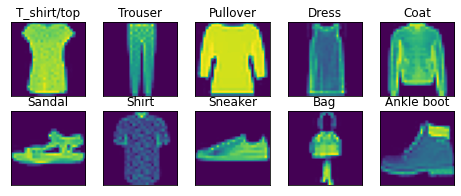

In [12]:
# plotting some random 10 images

class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [13]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [14]:
# Printing sample data
print(y_train[:10])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [16]:
# summary of the model
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)       

In [17]:
# compile
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255


In [18]:
# Training the model
history = model.fit(np.expand_dims(x_train, -1), y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.3,
              shuffle=True)

Epoch 1/25
329/329 [==============================] - 157s 476ms/step - loss: 7.9554 - accuracy: 0.7692 - val_loss: 8.0477 - val_accuracy: 0.5868
Epoch 2/25
329/329 [==============================] - 157s 476ms/step - loss: 6.7992 - accuracy: 0.8510 - val_loss: 6.3606 - val_accuracy: 0.8578
Epoch 3/25
329/329 [==============================] - 157s 476ms/step - loss: 5.9594 - accuracy: 0.8725 - val_loss: 5.5806 - val_accuracy: 0.8770
Epoch 4/25
329/329 [==============================] - 156s 475ms/step - loss: 5.2403 - accuracy: 0.8824 - val_loss: 4.9168 - val_accuracy: 0.8822
Epoch 5/25
329/329 [==============================] - 157s 477ms/step - loss: 4.6114 - accuracy: 0.8924 - val_loss: 4.3264 - val_accuracy: 0.8944
Epoch 6/25
329/329 [==============================] - 157s 476ms/step - loss: 4.0643 - accuracy: 0.8979 - val_loss: 3.8254 - val_accuracy: 0.8967
Epoch 7/25
329/329 [==============================] - 157s 478ms/step - loss: 3.5848 - accuracy: 0.9037 - val_loss: 3.3722 -

313/313 [==============================] - 9s 29ms/step - loss: 0.8643 - accuracy: 0.8310
Test Accuracy : 0.831


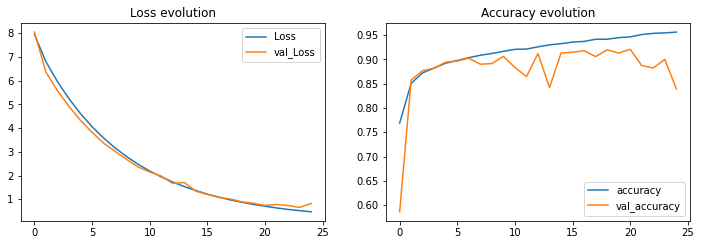

In [19]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

evaluation = model.evaluate(np.expand_dims(x_test, -1), y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')


In [20]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]
predicted_classes = model.predict_classes(np.expand_dims(x_test, -1))

print(classification_report(y_test, predicted_classes, target_names = target_names))


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


ValueError: ignored